In [1]:
import pandas as pd

In [2]:
german = pd.read_csv('../datasets/german_transl.csv', index_col = 0)

In [3]:
pt = pd.read_csv('Full_SV.csv', index_col = 0)

In [4]:
pt.dtypes

price           float64
ID              float64
vehicle_type     object
year            float64
transmission     object
horsepower      float64
km              float64
fuel_type        object
brand            object
dtype: object

In [5]:
german.groupby(['brand']).agg({'horsepower': 'mean', 'km': 'mean'})

#DataFrame.groupby(self, by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = False, observed: bool = False) 

,horsepower,km
brand,,
alfa_romeo,142.248207,125885.939742
audi,167.005675,125349.427918
bmw,174.861313,130611.090504
chevrolet,142.832309,96931.518876
chrysler,168.044025,133597.484277
citroen,96.860142,116716.731266
dacia,87.570978,84605.678233
daewoo,82.070248,121632.231405
daihatsu,68.444717,116179.361179


In [6]:
pt.groupby(['brand']).agg({'horsepower': 'mean', 'km': 'mean'})

,horsepower,km
brand,,
Abarth,160.119048,37407.166667
Alfa Romeo,134.398990,108884.419192
Aston Martin,401.166667,45700.666667
Audi,157.897910,137774.657556
Austin,68.000000,102000.000000
...,...,...
Tesla,401.000000,112600.571429
Toyota,108.184071,106861.338053
UMM,96.666667,209500.000000


In [7]:
dict_transm = {'automatic' : 1, 'manual': 0}

In [8]:
pt['transmission'] = pt['transmission'].map(dict_transm)

pt['transmission'].value_counts()

0.0    17177
1.0     6792
Name: transmission, dtype: int64

In [9]:
german['transmission'] = german['transmission'].map(dict_transm)

german['transmission'].value_counts()

0    169670
1     53726
Name: transmission, dtype: int64

In [10]:
transmissionger = german.groupby(['year']).agg({'transmission': 'mean'})

In [11]:
transmissionpt = pt.groupby(['year']).agg({'transmission': 'mean'})

In [12]:
german.groupby(['brand','fuel_type'])

In [13]:
pt.groupby(['brand','fuel_type'])

In [14]:
gas = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'gas')})
diesel = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'diesel')})
electric = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'electric')})
GPL = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'GPL')})
hybrid = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'hybrid')})
CNG = pt.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'CNG')})

#fuel_type_df = pd.concat([gas, diesel] axis = 0)
fuel_type_df_pt = pd.concat([gas, diesel, electric, GPL, hybrid, CNG], keys=['gas', 'diesel', 'electric', 'GPL', 'hybrid', 'CNG'], axis = 1)

In [15]:
gas = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'gas')})
diesel = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'diesel')})
electric = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'electric')})
GPL = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'GPL')})
hybrid = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'hybrid')})
CNG = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'CNG')})

#fuel_type_df = pd.concat([gas, diesel] axis = 0)
fuel_type_df_ger = pd.concat([gas, diesel, electric, GPL, hybrid, CNG], keys=['gas', 'diesel', 'electric', 'GPL', 'hybrid', 'CNG'], axis = 1)

In [16]:
#df.count()
fuel_type_df_ger['year_total'] = fuel_type_df_ger.sum(axis=1)
fuel_type_df_pt['year_total'] = fuel_type_df_pt.sum(axis=1)

In [17]:
fuel_type_ratios_pt = fuel_type_df_pt.loc[:,"gas":"CNG"].div(fuel_type_df_pt["year_total"], axis=0)
fuel_type_ratios_ger = fuel_type_df_ger.loc[:,"gas":"CNG"].div(fuel_type_df_ger["year_total"], axis=0)

#fuel_type_df['gas_ratio'] = fuel_type_df['gas'] / fuel_type_df['year_total']

#fuel_type_df

#for c in fuel_type_df:
#3    c = c/fuel_type_df['year_total']

In [18]:
fuel_type_ratios_pt.to_csv('fuel_type_ratios_pt.csv')
fuel_type_ratios_ger.to_csv('fuel_type_ratios_ger.csv')

In [19]:
fuel_type_ratios_ger[fuel_type_df_ger.index > 2000].to_csv('fuel_type_ratios_zoom2000_ger.csv')
fuel_type_ratios_pt[fuel_type_df_pt.index > 2000].to_csv('fuel_type_ratios_zoom2000_pt.csv')

In [20]:
fuel_type_ratios_ger.columns = fuel_type_ratios_ger.columns.get_level_values(0)
fuel_type_ratios_pt.columns = fuel_type_ratios_pt.columns.get_level_values(0)

In [21]:
import seaborn as sns

In [22]:
sns.set(palette = 'Pastel1')

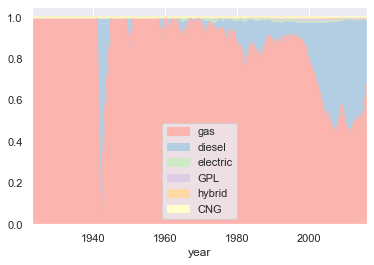

In [23]:
fuel_type_ratios_ger.plot.area().get_figure().savefig("stacked_histogram_fuel_type_ger.png", dpi=500)
#list_data = [fuel_type_ratios.loc[:"diesel", "a"], wide_df.loc["2003":, "b"]]
#ax = sns.lineplot(data=list_data)

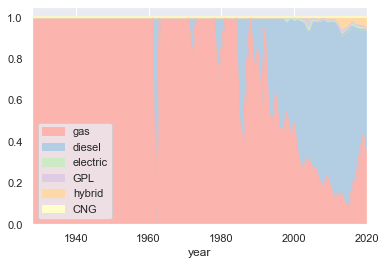

In [24]:
fuel_type_ratios_pt.plot.area().get_figure().savefig("stacked_histogram_fuel_type_pt.png", dpi=500)
#list_data = [fuel_type_ratios.loc[:"diesel", "a"], wide_df.loc["2003":, "b"]]
#ax = sns.lineplot(data=list_data)

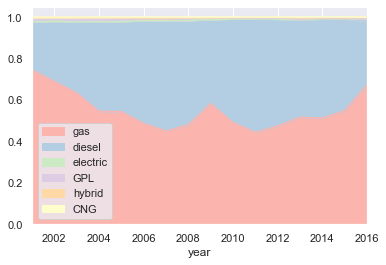

In [25]:
plots = fuel_type_ratios_ger[fuel_type_ratios_ger.index > 2000].plot.area().get_figure().savefig("stacked_histogram_zoom2000_fuel_type_ger.png", dpi=500)

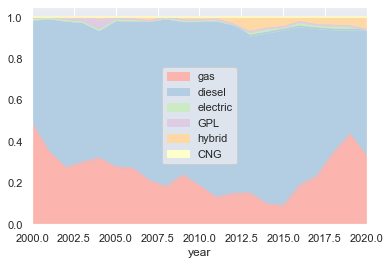

In [26]:
plots = fuel_type_ratios_pt[fuel_type_ratios_pt.index > 1999].plot.area().get_figure().savefig("stacked_histogram_zoom2000_fuel_type_pt.png", dpi=500)

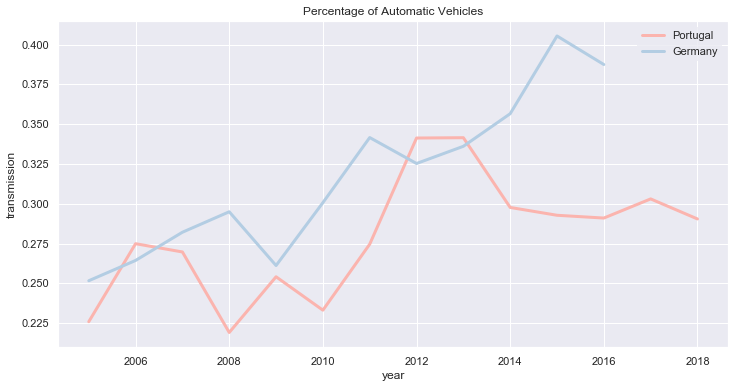

In [27]:
#sns.lineplot(data=german['transmission'])
#x = sns.lineplot(german.in)

#ax = sns.lineplot(x="year" y=1, data=german['transmission'])
#german['transmission'].value_counts()

#ax
transmissionger  = transmissionger[transmissionger.index > 2004]
transmissionpt  = transmissionpt.loc[(transmissionpt.index > 2004) & (transmissionpt.index < 2019)]

import matplotlib.pyplot as plot

fig_dims = (12, 6)
fig, ax = plot.subplots(figsize = fig_dims)
x = sns.lineplot(transmissionpt.index, transmissionpt['transmission'], label = 'Portugal')
y = sns.lineplot(transmissionger.index, transmissionger['transmission'], label = 'Germany')
plot.setp(x.lines,linewidth=3)
plot.setp(y.lines,linewidth=3)
plot.setp(ax.get_legend().get_texts(), fontsize='25')
plot.setp(ax.get_legend().get_title(), fontsize='30')
leg = plot.legend()
leg.get_frame().set_linewidth(0.0)
plot.title('Percentage of Automatic Vehicles').get_figure().savefig('transmission_ratio_compar.png')

In [28]:
german['brand'].value_counts()

volkswagen       47002
bmw              26960
mercedes_benz    23604
audi             21850
opel             21565
ford             14248
renault           9275
peugeot           6575
fiat              5154
seat              4343
skoda             4074
mazda             3380
toyota            3276
citroen           3096
smart             3007
nissan            2958
mini              2707
hyundai           2427
volvo             2170
porsche           1760
kia               1654
mitsubishi        1650
honda             1637
suzuki            1420
alfa_romeo        1394
chevrolet         1139
chrysler           795
dacia              634
land_rover         563
jeep               539
subaru             444
jaguar             421
daihatsu           407
saab               349
lancia             250
daewoo             242
rover              185
trabant            126
lada               116
Name: brand, dtype: int64

In [35]:
five_brands = ['BMW', 'Mercedes-Benz', 'Renault', 'Peugeot', 'VW']
pt['brand_ot'] = [x if x in five_brands else 'other' for x in pt['brand']]
pt_filt = pt[pt['year']>2010]
pt_filt.head()

,price,ID,vehicle_type,year,transmission,horsepower,km,fuel_type,brand,brand_ot
0,19900.0,8.075511e+09,large_family_car,2018.0,1.0,190.0,78453.0,diesel,Mercedes-Benz,Mercedes-Benz
1,9150.0,8.073872e+09,suv,2015.0,1.0,218.0,103322.0,diesel,BMW,BMW
3,16499.0,8.074633e+09,sports_tourism_van,2018.0,0.0,95.0,39854.0,diesel,Fiat,other
4,22990.0,8.073286e+09,small_car,2012.0,0.0,105.0,53500.0,diesel,Fiat,other
5,15500.0,8.074283e+09,coupé,2016.0,0.0,71.0,55677.0,gas,Smart,other


(0, 80000)

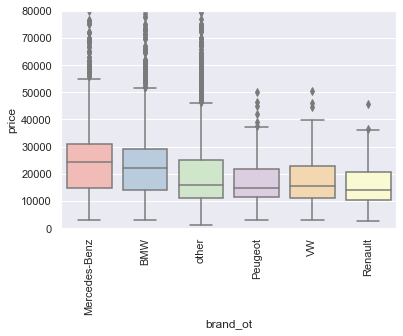

In [36]:
ax = sns.boxplot(x= "brand_ot", y= "price" , data = pt_filt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.ylim(0,80000)

In [37]:
five_brands = ['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel']

german['brand_ot'] = [x if x in five_brands else 'other' for x in german['brand']]
german_filt = german[german['year']>2010]
german_filt.head()

,price,vehicle_type,year,transmission,horsepower,km,fuel_type,brand,brand_ot
14,17999,suv,2011,0,187,70000,diesel,nissan,other
49,13500,van,2012,1,107,150000,diesel,mercedes_benz,mercedes_benz
56,39600,coupé,2014,1,301,30000,gas,bmw,bmw
76,7999,small_car,2013,0,78,40000,gas,nissan,other
95,14500,small_car,2013,0,84,60000,gas,audi,audi


(0, 80000)

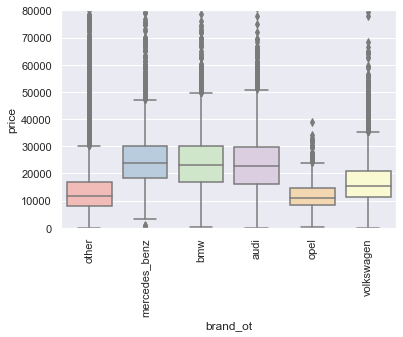

In [38]:
ax = sns.boxplot(x= "brand_ot", y= "price" , data = german_filt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.ylim(0,80000)

([<matplotlib.patches.Wedge at 0x7f11761386d0>,
 [Text(1.0105766045547309, 0.43443633172955404, 'Audi'),
  Text(0.4769978497950939, 0.9911977861611966, 'BMW'),
  Text(-0.13647775051567854, 1.0915007208491345, 'Mercedes'),
  Text(-0.6129677802224648, 0.9133840924874619, 'Opel'),
  Text(-1.0749679465118849, -0.5333328360152052, 'other'),
  Text(0.8252527511091994, -0.7272949173386942, 'VW')],
 [Text(0.5512236024843986, 0.236965271852484, '13%'),
  Text(0.26018064534277846, 0.5406533379061071, '10%'),
  Text(-0.07444240937218828, 0.5953640295540733, '8%'),
  Text(-0.3343460619395262, 0.49820950499316097, '6%'),
  Text(-0.627064635465266, -0.31111082100886966, '39%'),
  Text(0.4501378642413814, -0.3967063185483786, '23%')])

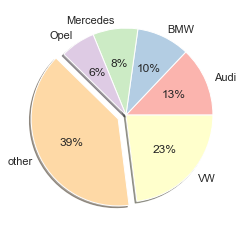

In [39]:
brandagger = german_filt.groupby(['brand_ot']).count()

brandagger
explode = (0, 0, 0, 0, 0.1, 0)
labels = ('Audi', 'BMW', 'Mercedes', 'Opel', 'other', 'VW')
plot.pie(brandagger['price'], explode=explode, shadow = True, labels = labels, autopct='%1.f%%')#, autopct='%1.1f%%', shadow=True, startangle=90)
#plot.axis('equal')
#plot.show()
#brandagger
